In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from models.model_fpgan import FPGANSynthesizer
from models.model_ctgan import CTGANSynthesizer
from models.model_dpctgan import DPCTGANSynthesizer

import ctgan
from sklearn.model_selection import train_test_split
from utils.privacy import normalized_avg_dist
from utils.fidelity import get_predictions, eval_fidelity, get_accuracy, get_roc_auc

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("D:/Datasets/fetal_health/fetal_health.csv")

data.fetal_health = data.fetal_health.replace(1, 0)
data.fetal_health = data.fetal_health.replace(2, 1)
data.fetal_health = data.fetal_health.replace(3, 1)

data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0


In [4]:
data.shape

(2126, 22)

In [5]:
#normalized_data=(data-data.mean())/data.std()
data=(data-data.min())/(data.max()-data.min())

In [6]:
target = 'fetal_health'

In [7]:
X = data.drop(columns=[target])
y = data[target]

In [8]:
#model_ctgan = CTGANSynthesizer(epochs=200, verbose=True)
#model_ctgan = DPCTGANSynthesizer(verbose=True)
model_ctgan = FPGANSynthesizer(epochs=200, verbose=True)
#original_losses, tranformed_privacies, losses = model_ctgan.fit(data)
model_ctgan.fit(data, rate=0.25)

Epoch 1, Loss G: -0.2879,Loss D: -0.1230
Epoch 2, Loss G: -0.2758,Loss D: -0.5740
Epoch 3, Loss G: -0.2415,Loss D: -1.2743
Epoch 4, Loss G: -0.2115,Loss D: -1.9487
Epoch 5, Loss G: -0.2417,Loss D: -1.7283
Epoch 6, Loss G: -0.3053,Loss D: -0.8998
Epoch 7, Loss G: -0.3363,Loss D: -0.5309
Epoch 8, Loss G: -0.3328,Loss D: -0.5694
Epoch 9, Loss G: -0.2942,Loss D: -1.0752
Epoch 10, Loss G: -0.2594,Loss D: -1.3513
Epoch 11, Loss G: -0.2350,Loss D: -1.5670
Epoch 12, Loss G: -0.2651,Loss D: -1.2918
Epoch 13, Loss G: -0.3159,Loss D:  0.0817
Epoch 14, Loss G: -0.3949,Loss D:  0.9852
Epoch 15, Loss G: -0.4589,Loss D:  1.5279
Epoch 16, Loss G: -0.5003,Loss D:  1.3143
Epoch 17, Loss G: -0.4883,Loss D:  0.9734
Epoch 18, Loss G: -0.4388,Loss D: -0.1247
Epoch 19, Loss G: -0.3407,Loss D: -1.3826
Epoch 20, Loss G: -0.2547,Loss D: -2.6250
Epoch 21, Loss G: -0.1803,Loss D: -3.9233
Epoch 22, Loss G: -0.1443,Loss D: -4.0226
Epoch 23, Loss G: -0.1858,Loss D: -3.0347
Epoch 24, Loss G: -0.2562,Loss D: -0.7878
E

([array(0.03881935, dtype=float32),
  array(0.03900619, dtype=float32),
  array(0.05034477, dtype=float32),
  array(0.06196859, dtype=float32),
  array(0.07216246, dtype=float32),
  array(0.0918192, dtype=float32),
  array(0.10836717, dtype=float32),
  array(0.1439564, dtype=float32),
  array(0.1655841, dtype=float32),
  array(0.21701066, dtype=float32),
  array(0.2547264, dtype=float32),
  array(0.2952928, dtype=float32),
  array(0.32586852, dtype=float32),
  array(0.35254872, dtype=float32),
  array(0.37523896, dtype=float32),
  array(0.3874739, dtype=float32),
  array(0.35452217, dtype=float32),
  array(0.35612395, dtype=float32),
  array(0.27959606, dtype=float32),
  array(0.23683715, dtype=float32),
  array(0.17031734, dtype=float32),
  array(0.06465045, dtype=float32),
  array(0.02600561, dtype=float32),
  array(-0.04017019, dtype=float32),
  array(-0.07268384, dtype=float32),
  array(-0.11387305, dtype=float32),
  array(-0.1154983, dtype=float32),
  array(-0.16800717, dtype=floa

In [9]:
from utils.utils import save_models
save_models(model_ctgan, '025fpgan200', 'fetal_health')

In [10]:
from utils.utils import load_models
model_ctgan = load_models('025fpgan200', 'fetal_health')

In [48]:
samples = model_ctgan.sample(len(data))  # Synthetic copy
samples.dropna(how='any', inplace=True)

X_syn = samples.drop(columns=[target])
y_syn = samples[target]
y_syn = y_syn.round(0)
y_syn = y_syn.astype(int)

## Privacy

In [49]:
samples = samples.apply(pd.to_numeric) # convert all columns of DataFrame
data = data.apply(pd.to_numeric) # convert all columns of DataFrame
samples = samples[:2000]
data = data[:2000]

In [50]:
normalized_avg_distance = normalized_avg_dist(samples, data)
print(normalized_avg_distance)

[0.20082436]


## Fidelity

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_syn, y_syn, test_size=0.3, random_state=42, stratify=y_syn)

rr_pred = []
fr_pred = []
ff_pred = []
rf_pred = []

rr_pred = get_predictions(X_train, y_train, X_test, y_test)
fr_pred = get_predictions(X_syn_train, y_syn_train, X_test, y_test)

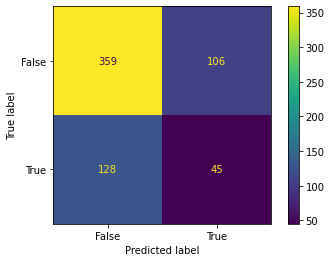

In [52]:
from sklearn import metrics
def print_confusion_matrix(rr_pred, fr_pred):
    confusion_matrix = metrics.confusion_matrix(rr_pred, fr_pred)

    cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display1.plot()
    plt.show()
    
print_confusion_matrix(rr_pred, fr_pred)

In [53]:
percentage = eval_fidelity(rr_pred, fr_pred)

In [54]:
rr_acc = get_accuracy(y_test, rr_pred)
fr_acc = get_accuracy(y_test, fr_pred)
print("Accuracy of real data: ", rr_acc)
print("Accuracy of synthetic data: ", fr_acc)

Accuracy of real data:  0.9278996865203761
Accuracy of synthetic data:  0.670846394984326


In [55]:
rr_score = get_roc_auc(y_test, rr_pred)
fr_score = get_roc_auc(y_test, fr_pred)
print("ROC AUC of real data: ", rr_score)
print("ROC AUC of synthetic data: ", fr_score)

ROC AUC of real data:  0.93594189248969
ROC AUC of synthetic data:  0.5347260870185652


In [56]:
#print(class1_ratio, class2_ratio)

## Final plot

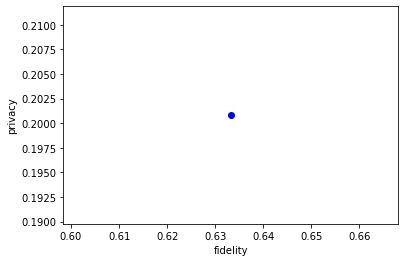

0.6332288401253918 [0.20082436]


In [57]:
plt.scatter(percentage, normalized_avg_distance, c ="blue")
plt.xlabel("fidelity")
plt.ylabel("privacy")
plt.show()
print(percentage, normalized_avg_distance)